### $$"Fifa-21\ Dataset"$$

##### $$Released\ by\ Jakup\ Ymeraj$$

$$January\ 2025$$

In [68]:
#deal with warnings
import warnings
warnings.filterwarnings('ignore')

#import libraries
import numpy as np                                                                                  
import pandas as pd                                                                                 
import matplotlib.pyplot as plt                                                                  
import seaborn as sns                                                                               

In [69]:
#load the dataset
file_path = "FIFA-21 Dataset.csv"
df = pd.read_csv(file_path, delimiter=';')

#display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nPreview of the Data:")
print(df.head())

#Data Cleaning
#check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

#check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicates:", duplicates)

#identify the numerical and categorical variables
numerical_vars = df.select_dtypes(include=['number'])
num_count = numerical_vars.shape[1]
num_var_names = numerical_vars.columns.tolist()

categorical_vars = df.select_dtypes(include=['object', 'category'])
cat_count = categorical_vars.shape[1]
cat_var_names = categorical_vars.columns.tolist()

print(f'Numerical variables: {num_count}', num_var_names)
print(f'Categorical variables: {cat_count}', cat_var_names)

#describe all dataset
print(print(df.describe(include='all')))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB

Preview of the Data:
   player_id               name  nationality  position  overall  age  hits  \
0     158023       Lionel Messi    Argentina  ST|CF|RW       94   33   299   
1      20801  Cristiano Ronaldo     Portugal     ST|LW       93   35   276   
2     190871          Neymar Jr       Brazil    CAM|LW       92   28   186   
3     203376    Virgil van Dijk  Netherland

#### **Exploratory Data Analysis (EDA)**

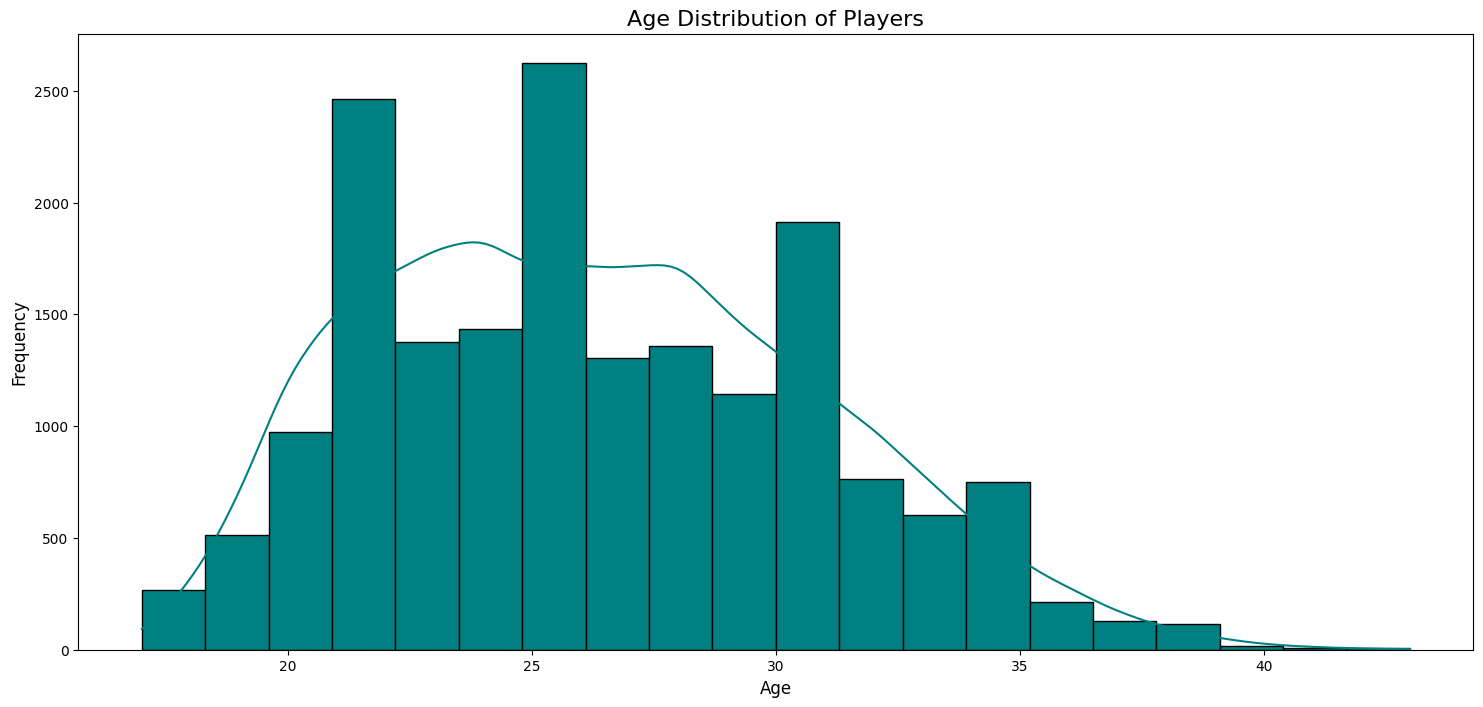

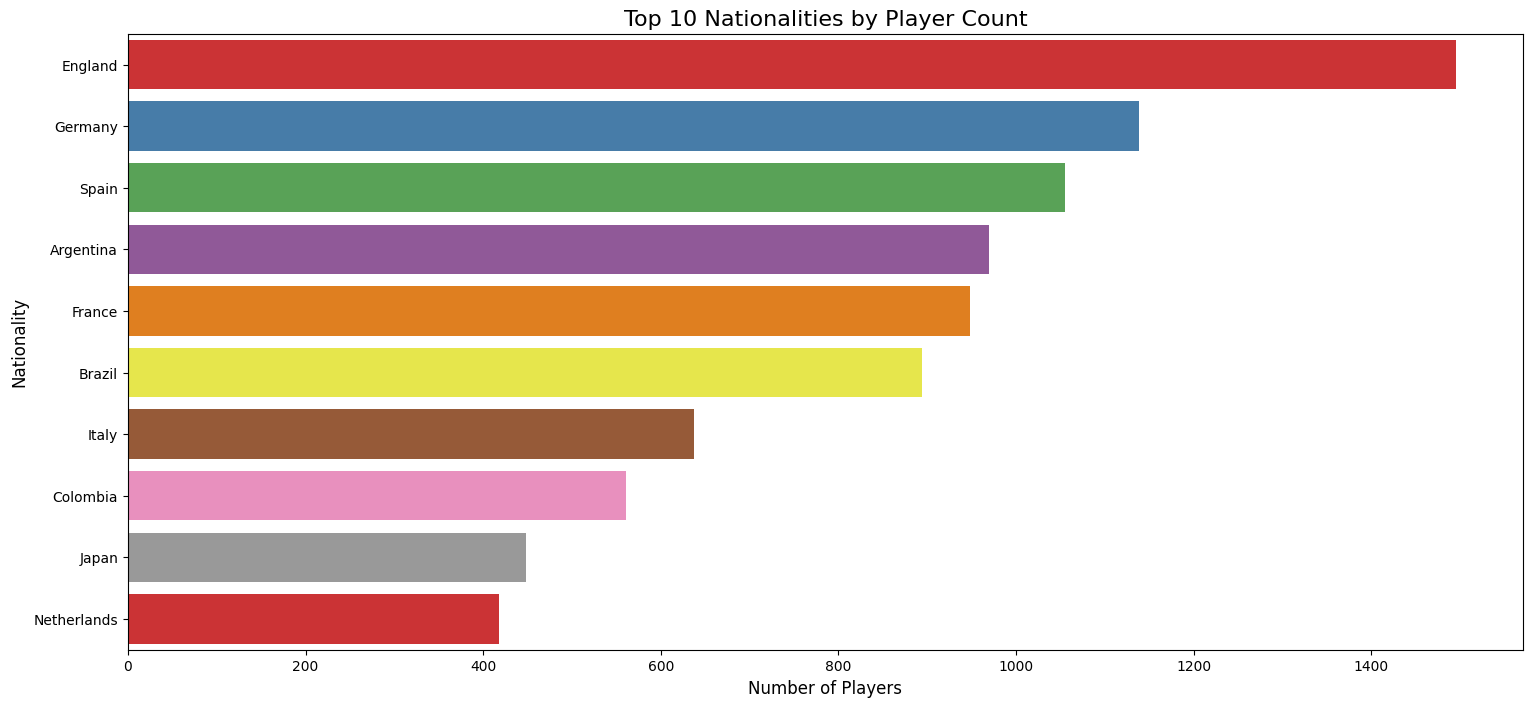

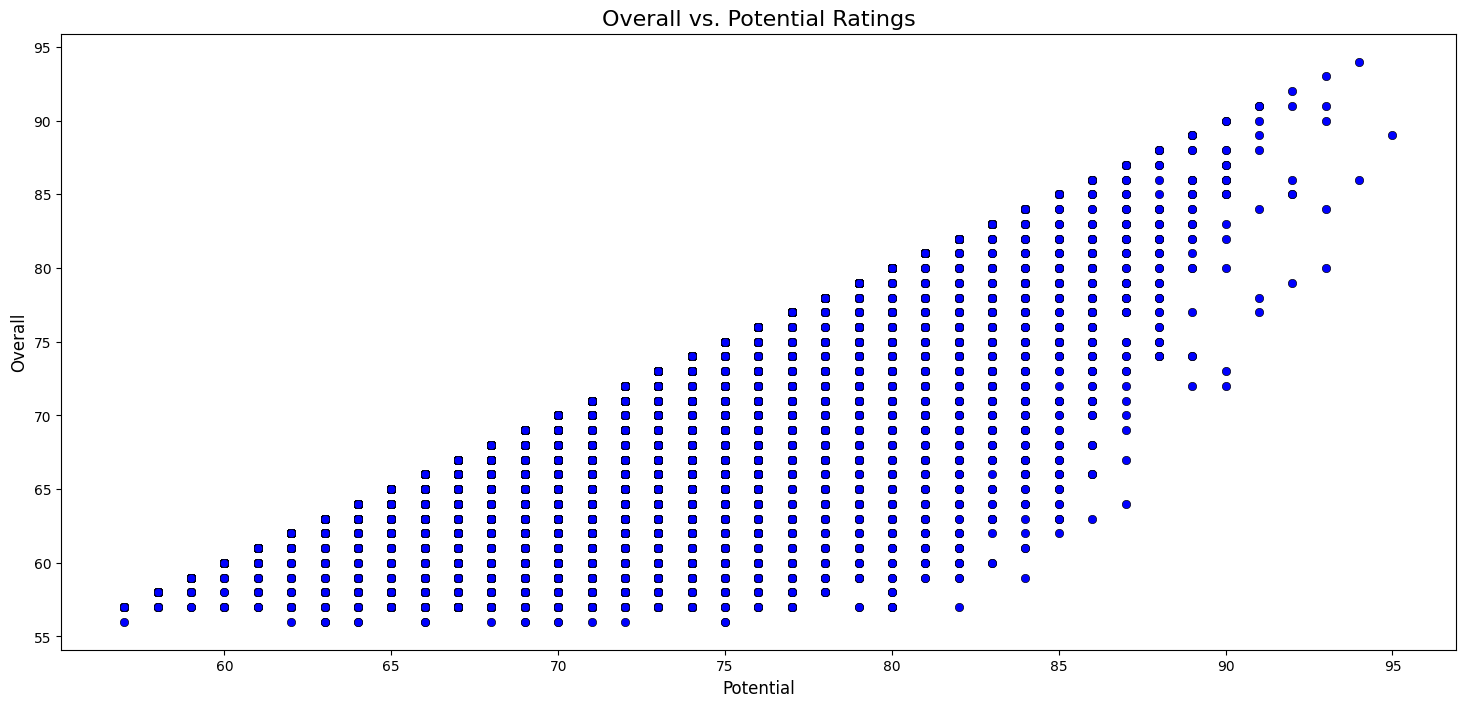

In [70]:
#1. Age distribution
plt.figure(figsize=(18, 8))
sns.histplot(df['age'], bins=20, kde=True, color='teal', alpha=1)
plt.title('Age Distribution of Players', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#2. Top 10 nationalities by player count
top_nationalities = df['nationality'].value_counts().head(10)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette='Set1')
plt.title('Top 10 Nationalities by Player Count', fontsize=16)
plt.xlabel('Number of Players', fontsize=12)
plt.ylabel('Nationality', fontsize=12)
plt.show()

#3. Relationship between overall and potential
plt.figure(figsize=(18, 8))
sns.scatterplot(data=df, x='potential', y='overall', alpha=1, color='blue', edgecolor='black')
plt.title('Overall vs. Potential Ratings', fontsize=16)
plt.xlabel('Potential', fontsize=12)
plt.ylabel('Overall', fontsize=12)
plt.show()

#### **ML Modeling**


Model Performance:
Linear Regression:
  Mean Squared Error: 3.0854265126672376
  R-squared: 0.9114986091728976

Ridge Regression:
  Mean Squared Error: 3.0873901363362966
  R-squared: 0.911442285217341

Lasso Regression:
  Mean Squared Error: 9.993927845150457
  R-squared: 0.7133373585498479

Random Forest:
  Mean Squared Error: 2.972688211871915
  R-squared: 0.9147323586655229

Gradient Boosting:
  Mean Squared Error: 2.410388743541451
  R-squared: 0.9308611774217884

Best Model: Gradient Boosting


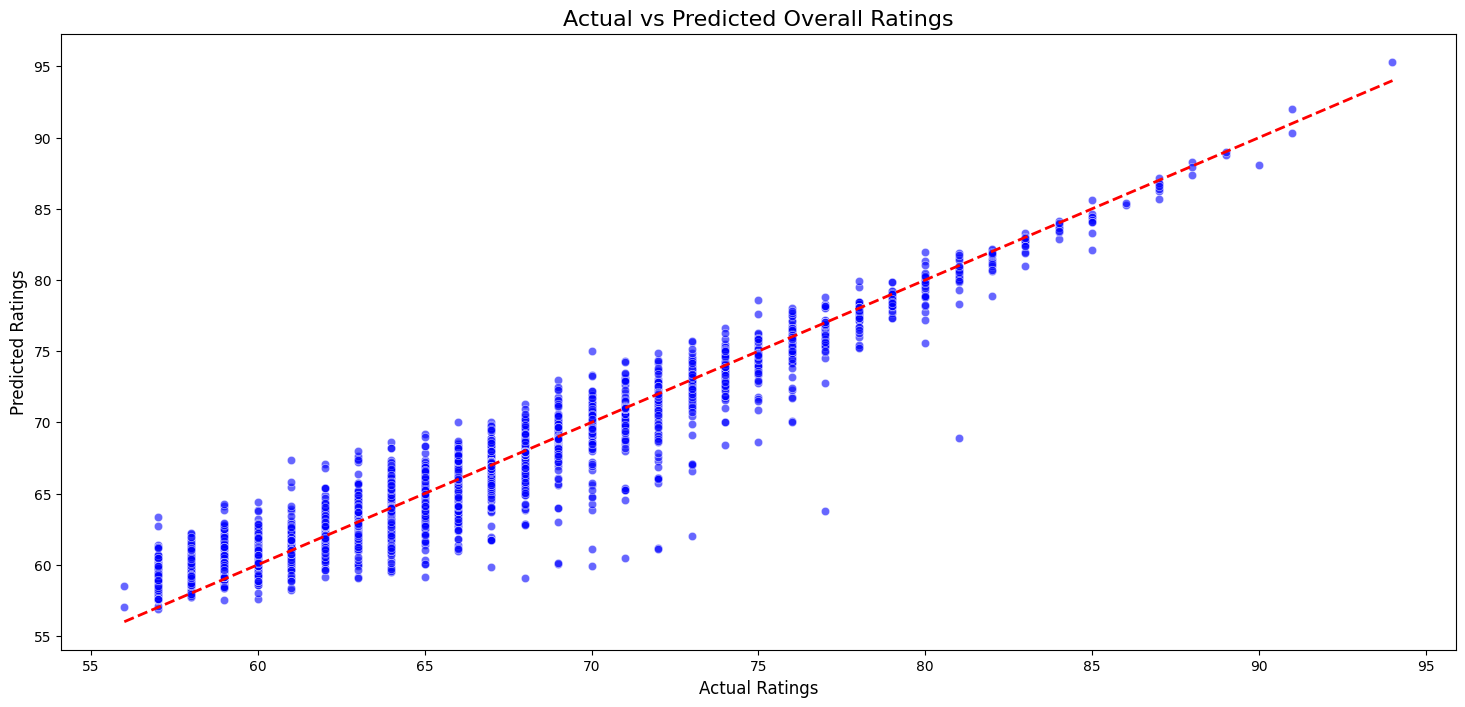

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
#extracting primary position from the position column
df['primary_position'] = df['position'].apply(lambda x: x.split('|')[0])

#adding more features
df['age_squared'] = df['age'] ** 2  # Non-linear feature
df['hits_potential_ratio'] = df['hits'] / (df['potential'] + 1)  # Interaction feature

#encoding categorical variables (primary_position)
df = pd.get_dummies(df, columns=['primary_position'], drop_first=True)

# Machine Learning Model
#predicting overall rating
features = ['age', 'hits', 'potential', 'age_squared', 'hits_potential_ratio'] + \
        [col for col in df.columns if col.startswith('primary_position_')]
X = df[features]
y = df['overall']

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model Selection and Hyperparameter Tuning
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

#evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

print("\nModel Performance:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {metrics['MSE']}")
    print(f"  R-squared: {metrics['R2']}")
    print()

#select the best model
best_model_name = min(results, key=lambda x: results[x]['MSE'])
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

#Visualization of Predictions
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(18, 8))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted Overall Ratings', fontsize=16)
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.show()

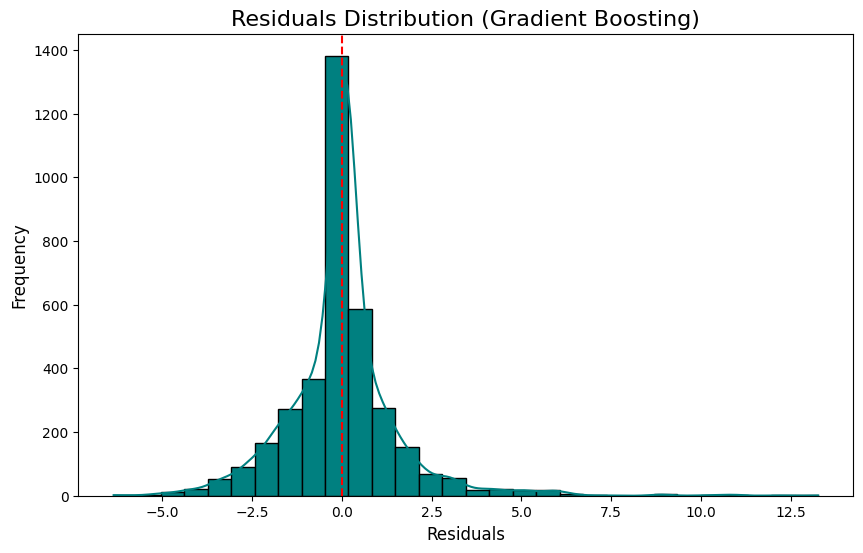

Cross-Validation RMSE: 1.6115582384086284 ± 0.06394833896704477


In [72]:
#Feature Importance
from sklearn.model_selection import cross_val_score

#Residuals Distribution
residuals = y_test - y_pred_best
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='teal', alpha=1)
plt.title('Residuals Distribution (Gradient Boosting)', fontsize=16)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(0, color='red', linestyle='--')
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}")

In [73]:
from scipy.stats import shapiro                            #type:ignore
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")

if(p < 0.05):
    print("Residuals are not Normally Distributed, we reject the Null Hypothesis.")

Shapiro-Wilk Test Statistic: 0.877571612405973, p-value: 1.0296870408437458e-46
Residuals are not Normally Distributed, we reject the Null Hypothesis.
